<a href="https://colab.research.google.com/github/Neha-Garg2/Label-Encoding-and-OHE/blob/main/ASSIGNMENT_4_Neha_Garg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/dataset_model.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
for i in df:
  if df[i].is_unique:
    df = df.drop(i,axis=1)           #dropping loan_Id from dataset
    print(i)
df.head()

Loan_ID


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#Continous variables
cols = df._get_numeric_data().columns
cont_cols = []
for i in cols:
  if(len(df[i].unique())) > int(df.shape[0]/25):
     cont_cols.append(i)
print (cont_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [ ]:
#Categorical variables
cate_cols = list(set(df.columns) - set(cont_cols))
cate_cols

['Dependents',
 'Gender',
 'Credit_History',
 'Loan_Amount_Term',
 'Self_Employed',
 'Married',
 'Education',
 'Loan_Status',
 'Property_Area']

In [ ]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df.groupby('Loan_Status').count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,
N,187,192,186,192,183,192,192,181,186,179,192
Y,414,419,413,422,399,422,422,411,414,385,422


In [ ]:
#Missing value imputation
#Missing Values in Continous Columns value with Mean
df.mean()

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.412162
Loan_Amount_Term      342.000000
Credit_History          0.842199
dtype: float64

In [ ]:
#Continous columns have missing value
for cols in cont_cols:
  if ( df[cols].isnull().sum() > 0):
    df[cols] = df[cols].fillna(df[cols].median())
df[cont_cols].isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
dtype: int64

In [ ]:
#Missing value in categorical columns
df[cate_cols].isnull().sum()

Dependents          15
Gender              13
Credit_History      50
Loan_Amount_Term    14
Self_Employed       32
Married              3
Education            0
Loan_Status          0
Property_Area        0
dtype: int64

In [ ]:
#Categorical columns have missing value
for cols in cate_cols:
  if ( df[cols].isnull().sum() > 0):
    df[cols] = df[cols].fillna(df[cols].mode().iloc[0])
df[cate_cols].isnull().sum()

Dependents          0
Gender              0
Credit_History      0
Loan_Amount_Term    0
Self_Employed       0
Married             0
Education           0
Loan_Status         0
Property_Area       0
dtype: int64

In [ ]:
#Handling missing values
df.isnull().sum().sum()       #No null values found

0

In [ ]:
#Outlier detection in cont_cols
df[cont_cols].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
dtype: float64

In [ ]:
#Outlier Handling
for i in cont_cols:
  l_val = df[i].quantile(0.05)
  H_val = df[i].quantile(0.95)
  df[i] = np.where(df[i] < l_val,l_val,df[i])
  df[i] = np.where(df[i] > H_val,H_val,df[i])
  print(str(i)+' : '+str(df[i].skew()))

ApplicantIncome : 1.7637799807028802
CoapplicantIncome : 0.8452039718003408
LoanAmount : 1.0735431716457349


**Use Label Encoder as encoding technique on features , predict using below algorithms**

1.   Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -Precision ,Recall & F1 Score ,AUROC



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_tar = pd.DataFrame(le.fit_transform(df['Loan_Status']))
df_tar.columns = (['Loan_Status'])
df_tar.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [ ]:
print(df_tar['Loan_Status'].value_counts())
lbl_1,lbl_0 = df_tar['Loan_Status'].value_counts()
print("L_1 class = "+str((lbl_1*100)/df_tar['Loan_Status'].count()))
print("L_0 class = "+str((lbl_0*100)/df_tar['Loan_Status'].count()))

1    422
0    192
Name: Loan_Status, dtype: int64
L_1 class = 68.72964169381108
L_0 class = 31.270358306188925


In [ ]:
df=df.drop(columns='Loan_Status')
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
df_le = df.copy()
cat = list(set(cate_cols) - set(['Loan_Status']))
cat

['Dependents',
 'Gender',
 'Credit_History',
 'Loan_Amount_Term',
 'Self_Employed',
 'Married',
 'Education',
 'Property_Area']

In [ ]:
for j in cat :
  df_le['enc_'+str(j)] = le.fit_transform(df_le[j])
df_a= df_le.drop(columns = cat)
df_a.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,enc_Dependents,enc_Gender,enc_Credit_History,enc_Loan_Amount_Term,enc_Self_Employed,enc_Married,enc_Education,enc_Property_Area
0,5849.0,0.0,128.0,0,1,1,8,0,0,0,2
1,4583.0,1508.0,128.0,1,1,1,8,0,1,0,0
2,3000.0,0.0,66.0,0,1,1,8,1,1,0,2
3,2583.0,2358.0,120.0,0,1,1,8,0,1,1,2
4,6000.0,0.0,141.0,0,1,1,8,0,0,0,2


In [ ]:
df_a.shape

(614, 11)

In [ ]:
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(df_a, df_tar, test_size=0.20, random_state=42, stratify=df_tar)
print("Train Feature set = "+str(len(X_train)))
print("Train Label Feature set = "+str(len(y_train)))
print("Test Feature set = "+str(len(X_test)))
print("Test label set = "+str(len(y_test)))

Train Feature set = 491
Train Label Feature set = 491
Test Feature set = 123
Test label set = 123


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train['Loan_Status'])
y_pred = model.predict(X_test)
print("Confusion Matrix = \n",confusion_matrix(y_test,y_pred))
print("Accuracy of LR Model = ",accuracy_score(y_test, y_pred))
print("Precision of LR Model = ",precision_score(y_test, y_pred))
print ("Recall of LR Model = ",recall_score(y_test, y_pred))
print ("F1 Score of LR Model = ",f1_score(y_test, y_pred))
print("ROC score = ",roc_auc_score(y_test,y_pred))

Confusion Matrix = 
 [[21 17]
 [ 1 84]]
Accuracy of LR Model =  0.8536585365853658
Precision of LR Model =  0.8316831683168316
Recall of LR Model =  0.9882352941176471
F1 Score of LR Model =  0.903225806451613
ROC score =  0.7704334365325077


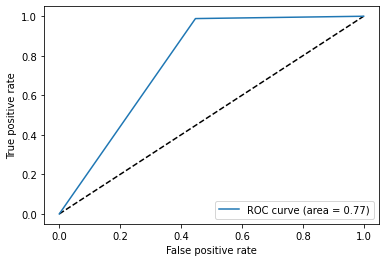

In [ ]:
#ROC CURVE REPRESENTATION
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

2.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on- Precision ,Recall & F1 Score ,AUROC 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
b = RandomForestClassifier(random_state=42)
b.fit(X_train,y_train)
y_pred2=b.predict(X_test)
print("Confusion Matrix = \n ",confusion_matrix(y_test,y_pred))
print("Accuracy of RFC  = ",accuracy_score(y_test, y_pred))
print("Precision of RFC = ", precision_score(y_test, y_pred))
print("Recall of RFC = ", recall_score(y_test, y_pred))
print("F1 Score of RFC = ", f1_score(y_test, y_pred))
print("ROC_AUC score of RFC = ", roc_auc_score(y_test,y_pred))

Confusion Matrix = 
  [[21 17]
 [ 1 84]]
Accuracy of RFC  =  0.8536585365853658
Precision of RFC =  0.8316831683168316
Recall of RFC =  0.9882352941176471
F1 Score of RFC =  0.903225806451613
ROC_AUC score of RFC =  0.7704334365325077


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


**Use One hot Encoder as encoding technique on feature , predict using the below algorithms**

3.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on - Precision ,Recall & F1 Score ,AUROC

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
df_ohe=df.copy()
for j in cat:
  df_ohe=pd.get_dummies(df_ohe,columns=[j],prefix=[j])
df_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,Gender_Male,Credit_History_0.0,Credit_History_1.0,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Self_Employed_No,Self_Employed_Yes,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1
1,4583.0,1508.0,128.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0
2,3000.0,0.0,66.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1
3,2583.0,2358.0,120.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1
4,6000.0,0.0,141.0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1


In [ ]:
df_ohe.shape

(614, 30)

In [ ]:
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(df_ohe, df_tar, test_size=0.25, random_state=42, stratify=df_tar)
model.fit(X_train_ohe, y_train_ohe)    #training the dataset
y_pred3 = model.predict(X_test_ohe)
print("Confusion Matrix = \n",confusion_matrix(y_test,y_pred))
print("Accuracy of LR Model = ",accuracy_score(y_test, y_pred))
print("Precision of LR Model = ", precision_score(y_test, y_pred))
print("Recall of LR Model = ",recall_score(y_test, y_pred))
print("F1 Score of LR Model = ", f1_score(y_test, y_pred))
print("ROC_AUC score of LR Model = ",roc_auc_score(y_test,y_pred))

Confusion Matrix = 
 [[21 17]
 [ 1 84]]
Accuracy of LR Model =  0.8536585365853658
Precision of LR Model =  0.8316831683168316
Recall of LR Model =  0.9882352941176471
F1 Score of LR Model =  0.903225806451613
ROC_AUC score of LR Model =  0.7704334365325077


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on - Precision ,Recall & F1 Score ,AUROC

In [ ]:
c = RandomForestClassifier(random_state=42)
c.fit(X_train,y_train)
y_pred4=c.predict(X_test)
print("Confusion Matrix = \n ",confusion_matrix(y_test,y_pred))
print("Accuracy of RFC  = ",accuracy_score(y_test, y_pred))
print("Precision of RFC = ", precision_score(y_test, y_pred))
print("Recall of RFC = ", recall_score(y_test, y_pred))
print("F1 Score of RFC = ", f1_score(y_test, y_pred))
print("ROC_AUC score of RFC = ", roc_auc_score(y_test,y_pred))

Confusion Matrix = 
  [[21 17]
 [ 1 84]]
Accuracy of RFC  =  0.8536585365853658
Precision of RFC =  0.8316831683168316
Recall of RFC =  0.9882352941176471
F1 Score of RFC =  0.903225806451613
ROC_AUC score of RFC =  0.7704334365325077


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


CONCLUSION: 
One hot encoding gives the better output in both algorithms